In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import pearsonr

In [27]:
df = pd.read_csv('weather data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01-01-12 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,01-01-12 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,01-01-12 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,01-01-12 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,01-01-12 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [65]:
#key characteristics of the dataset, number of records, features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
#Identify and handle any missing or null values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [9]:
#Check for and address any duplicate records.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

In [11]:
#Provide a statistical summary of the dataset for numerical features
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


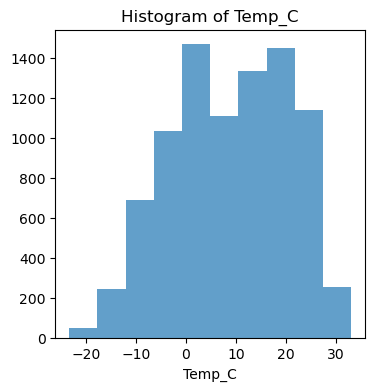

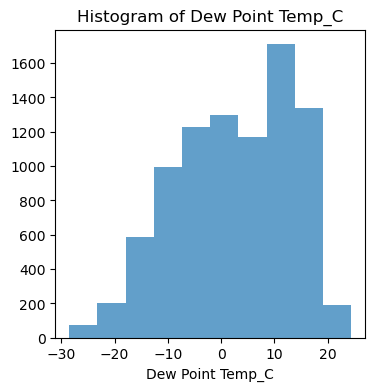

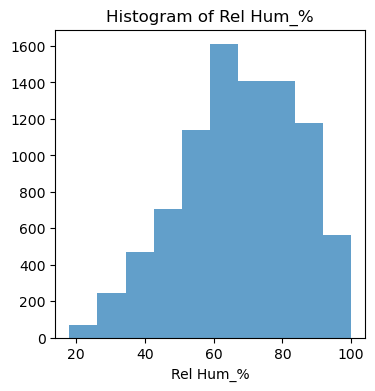

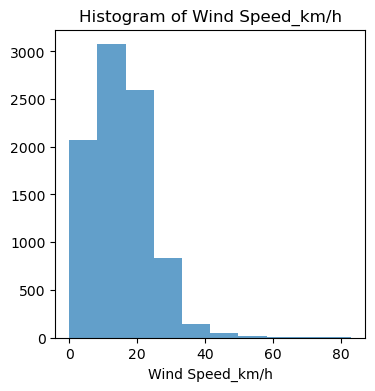

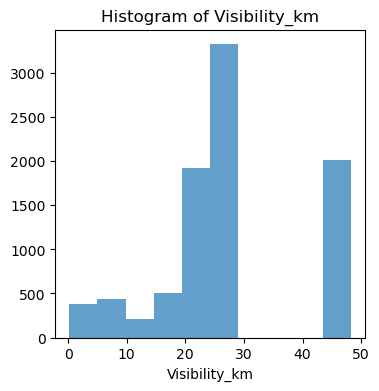

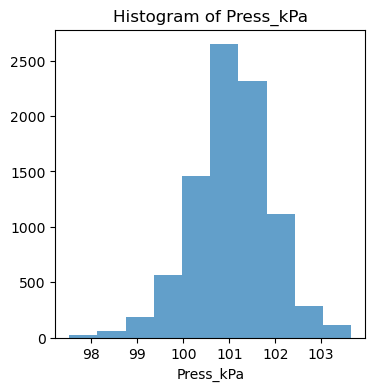

In [37]:
#Create visualizations to show the distribution of key weather parameters
columns = ['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']
for col in columns:
    plt.figure(figsize=(4, 4))
    plt.hist(df[col], bins=10, alpha=0.7)  # Adjust bins and alpha as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
#Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

In [79]:
#Create correlation matrices and heat maps to identify relationships between different weather parameters.
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
corr_matrix


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


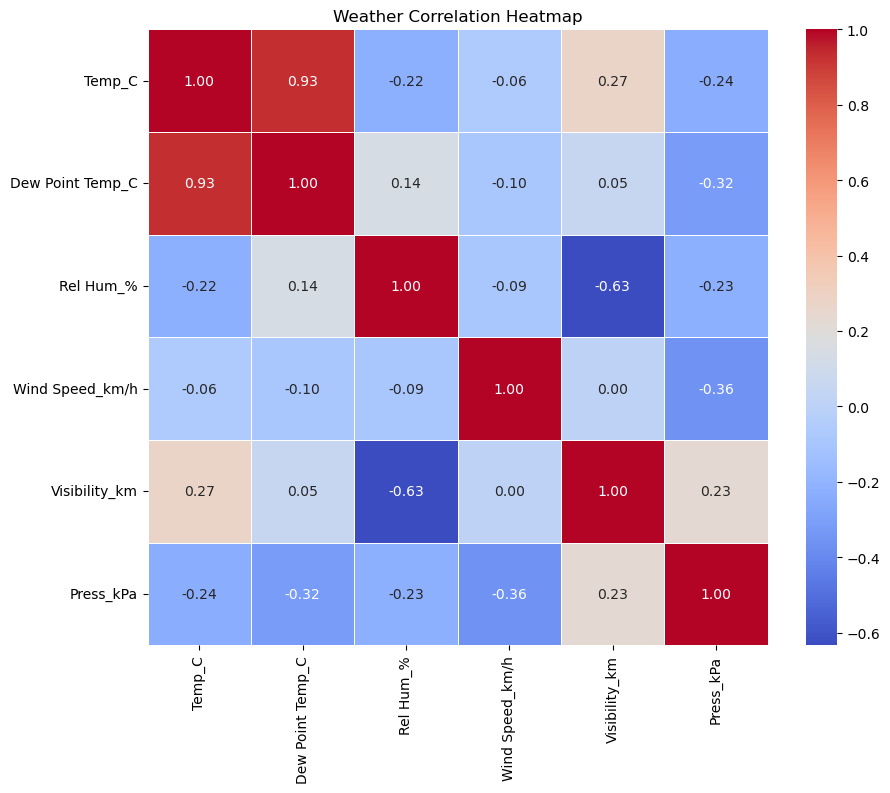

In [99]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Weather Correlation Heatmap')
plt.show()

(0.0, 35.815)

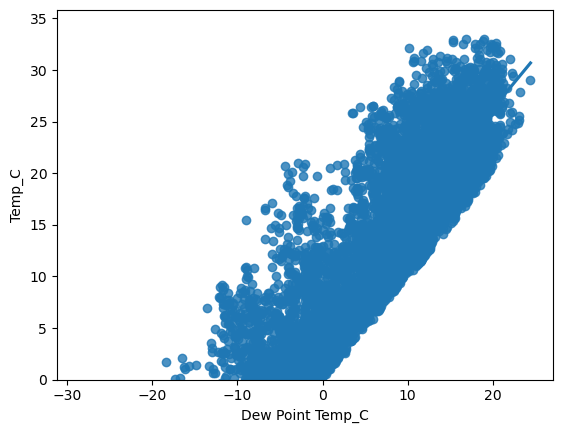

In [83]:
sns.regplot(x = "Dew Point Temp_C", y = "Temp_C", data = df)
plt.ylim(0,)

In [107]:
#Weather Patterns and Trends:
#Analyze and describe any trends or patterns you observe in the data. For instance, 
#how do temperature and humidity vary across different seasons or months?
df['Weather'].nunique()

50

In [115]:
weather_seasons=df['Weather'].value_counts()
weather_seasons

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [ ]:
#Parse_date Function, tries to breakdown the date using two different formats, if one format fails, it moves to the next. 
#If all formats fail, it returns NaT (Not a Time). Apply(parse_date): This applies the parsing function to each element in the Date/Time column. 
#dropna(): This removes any rows where date parsing failed. Splitting the Components: Once the dates are parsed, 
#allows easy extraction of the year, month, day and hour as separate columns.

In [29]:
def parse_date(date_str):
    for fmt in ('%d-%m-%y %H:%M', '%m/%d/%Y %H:%M'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    return pd.NaT  # Return NaT if parsing fails

# Apply the function to the 'Date/Time' column
df['Date/Time'] = df['Date/Time'].apply(parse_date)

# Drop rows where the date conversion failed
df.dropna(subset=['Date/Time'], inplace=True)

# Split the Date/Time column into components
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour

# Display the first few rows
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day,Hour
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012,1,1,0
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012,1,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012,1,1,2
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012,1,1,3
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012,1,1,4
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog,2012,1,1,5
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog,2012,1,1,6
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog,2012,1,1,7
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog,2012,1,1,8
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog,2012,1,1,9


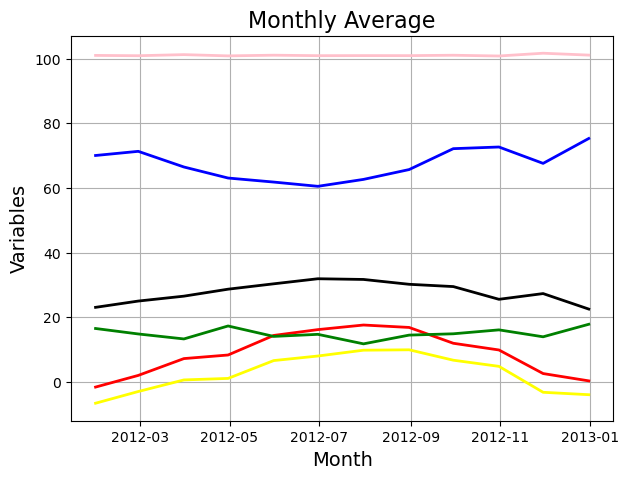

In [31]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Resample the data to get the monthly average 
monthly_avg_temp = df['Temp_C'].resample('ME').mean()
monthly_avg_hum = df['Rel Hum_%'].resample('ME').mean()
monthly_avg_wind = df['Wind Speed_km/h'].resample('ME').mean()
monthly_avg_dew = df['Dew Point Temp_C'].resample('ME').mean()
monthly_avg_vis = df['Visibility_km'].resample('ME').mean()
monthly_avg_pres = df['Press_kPa'].resample('ME').mean()

# Plotting the monthly average 
plt.figure(figsize=(7, 5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, color='red', linewidth=2)
plt.plot(monthly_avg_hum.index, monthly_avg_hum, color='blue', linewidth=2)
plt.plot(monthly_avg_wind.index, monthly_avg_wind, color='green', linewidth=2)
plt.plot(monthly_avg_dew.index, monthly_avg_dew, color='yellow', linewidth=2)
plt.plot(monthly_avg_vis.index, monthly_avg_vis, color='black', linewidth=2)
plt.plot(monthly_avg_pres.index, monthly_avg_pres, color='pink', linewidth=2)

# Adding title and labels
plt.title('Monthly Average', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()